In [1]:
# Import Libraries and Dependencies
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [2]:
# Reading Whale Returns CSV

In [3]:
# Read the whale returns portfolio and clean the data
whale_returns_csv = Path("whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Let's Determine the number of nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Let's Drop Null Values
whale_returns_df.dropna(inplace=True)
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
# Let's determine the number of remaining nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
# Algorithmic Daily Returns

# Read the Algorithmic daily returns and clean the data

In [8]:
# Algorithmic daily returns
algo_returns_csv = Path("algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Let's count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Let's drop null values 
algo_returns_df.dropna(inplace=True)
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [11]:
# Let's count remaining null values 
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [12]:
# S&P500 Returns

# Read The S&P500 Historic Closing Prices and Create a New Daily Returns
# DataFrame from the Data

In [13]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df = sp500_history_df.sort_index()
sp500_history_df.head(5)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [14]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [15]:
# Fix Data Type
# Let's remove dollar signs from the closing prices
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace("$", "")
sp500_history_df.head()
sp500_history_df['Close'] = sp500_history_df['Close'].astype(float)

In [16]:
sp500_history_df.dtypes

Close    float64
dtype: object

In [17]:
# Calculate Daily Returns
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [18]:
# Drop Nulls
sp500_returns_df.dropna(inplace=True)
sp500_returns_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [19]:
# Rename Column

In [20]:
sp500_returns_df.rename(columns = {"Close":"S&P 500"}, inplace = True)
sp500_returns_df

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [21]:
# Combine Whale, Algorithmic, and S&P500 Returns

In [22]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_returns_df], axis="columns", join="inner")
# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [23]:
# Portfolio Analysis

# In this Section I will Calculate and Visualize Performance and Risk Metrics for this Portfolio

In [24]:
# Performance

# Let's Calculate and Plot the daily returns and cumulative returns.
# Does any portfolio outperfom the S&P 500?

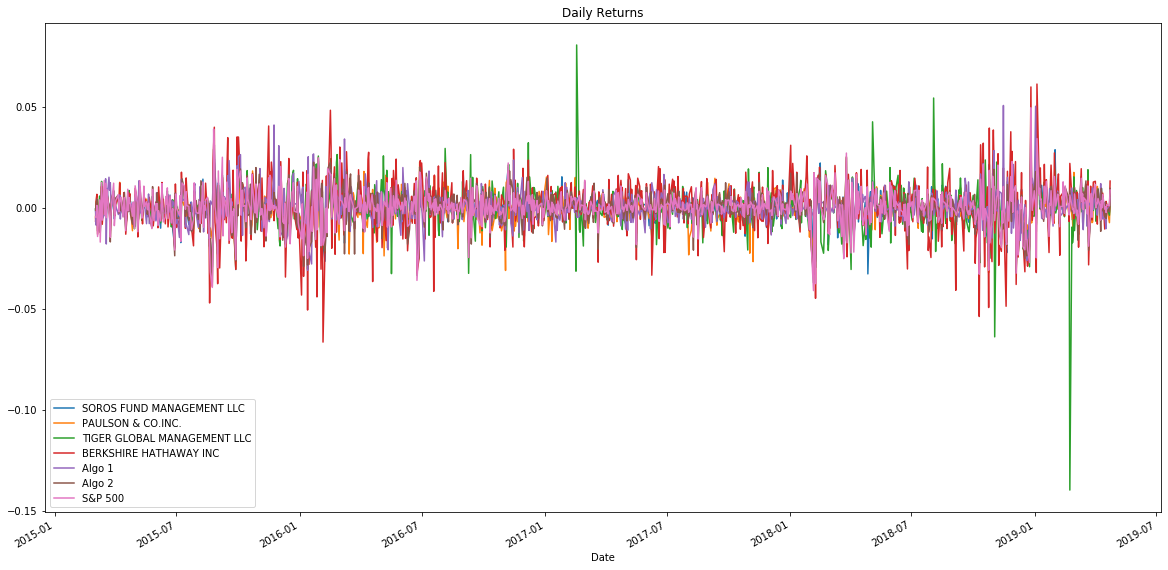

In [25]:
# Let's plot daily returns
combined_df.plot(figsize=(20, 10), title='Daily Returns')

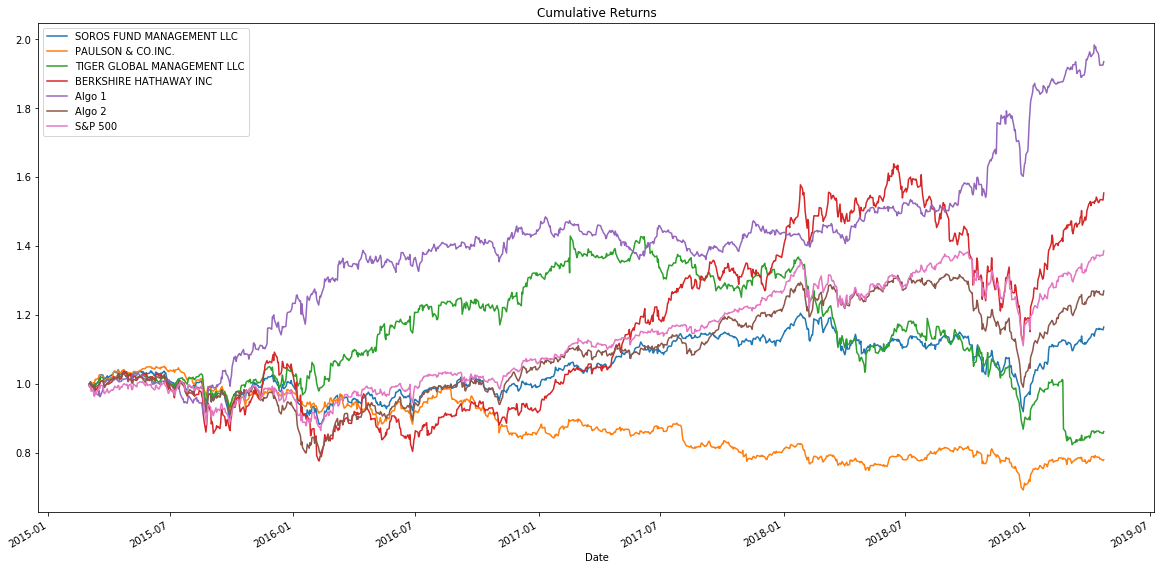

In [26]:
# Let's calculate and plot cumulative returns 
cumulative_returns = (1 + combined_df).cumprod() 
cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns')

In [27]:
# Risk

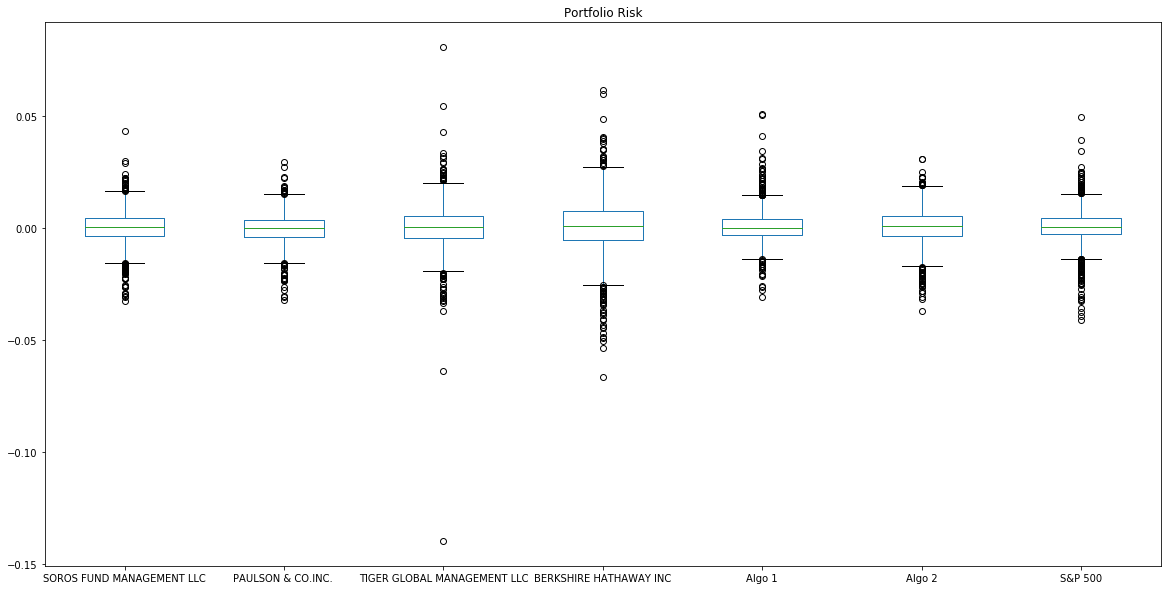

In [28]:
#Determine the risk of each portfolio:
    
#Create a box plot for each portfolio. 
#Calculate the standard deviation for all portfolios
#Determine which portfolios are riskier than the S&P 500
#Calculate the Annualized Standard Deviation

combined_df.plot(kind= "box", figsize= (20, 10), title='Portfolio Risk')

In [29]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?

In [30]:
# Standard deviation of portfolios
volatility = combined_df.std()
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [31]:
# Determine which portfolios are riskier than the sp500

In [32]:
volatility > volatility['S&P 500']

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [33]:
# Calculate the anualysed standard deviation 252 trading days

In [34]:
volatility = combined_df.std()*np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

In [35]:
# Rolling Statistics

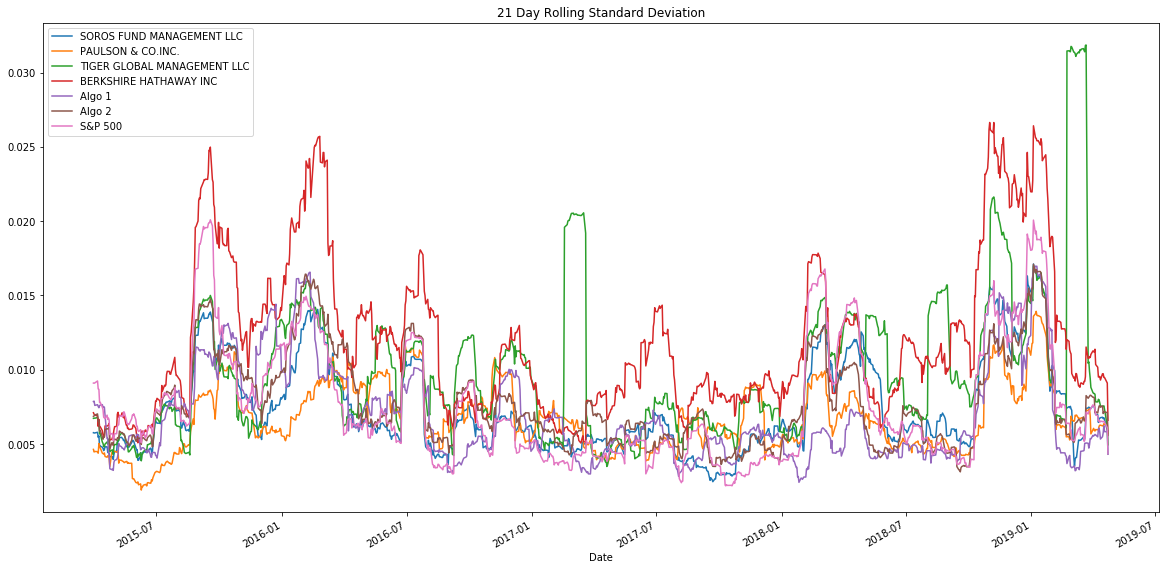

In [36]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_df.rolling(window=21).std().plot(figsize=(20, 10), title='21 Day Rolling Standard Deviation')

In [37]:
# Construct a correlation table

In [38]:
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [39]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# Beta = covariance/variance

In [99]:
# Calculate Covariance for Berkshire Hathaway Inc vs S&P 500

In [41]:
covariance = whale_returns_df['BERKSHIRE HATHAWAY INC'].cov(sp500_returns_df['S&P 500'])
covariance

8.302834941861689e-05

In [42]:
# Calculate Variance for Berkshire Hathaway Inc

In [43]:
variance = whale_returns_df['BERKSHIRE HATHAWAY INC'].var()
variance

0.0001646285942990748

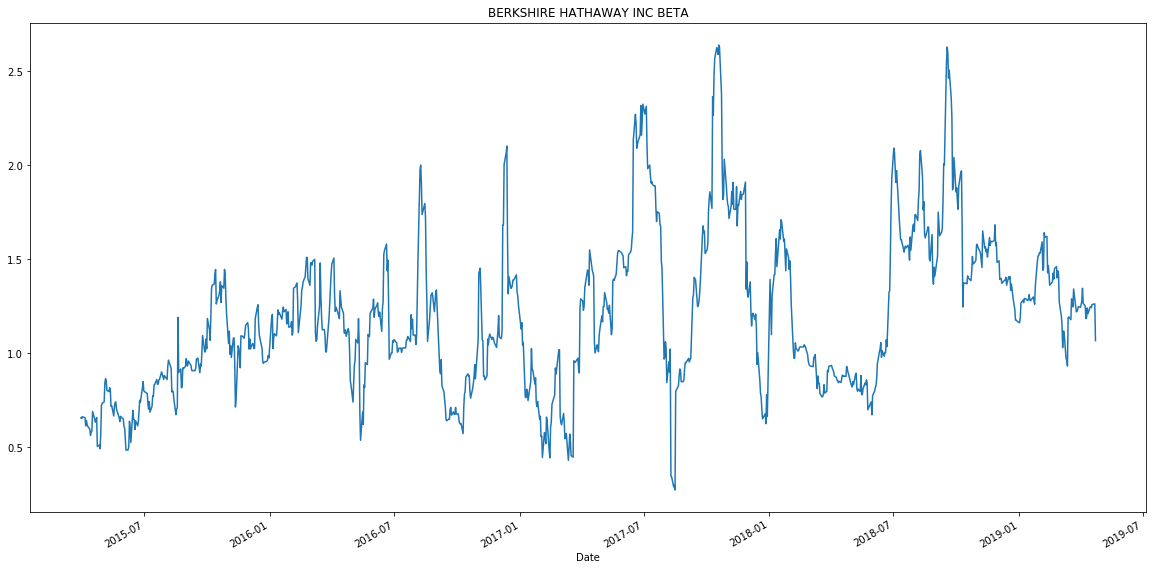

In [44]:
Berkshire_Roll = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(sp500_returns_df['S&P 500'])/sp500_returns_df['S&P 500'].rolling(window=21).var()
Berkshire_Roll.dropna(inplace=True)
Berkshire_Roll.plot(figsize=(20, 10), title='BERKSHIRE HATHAWAY INC BETA')

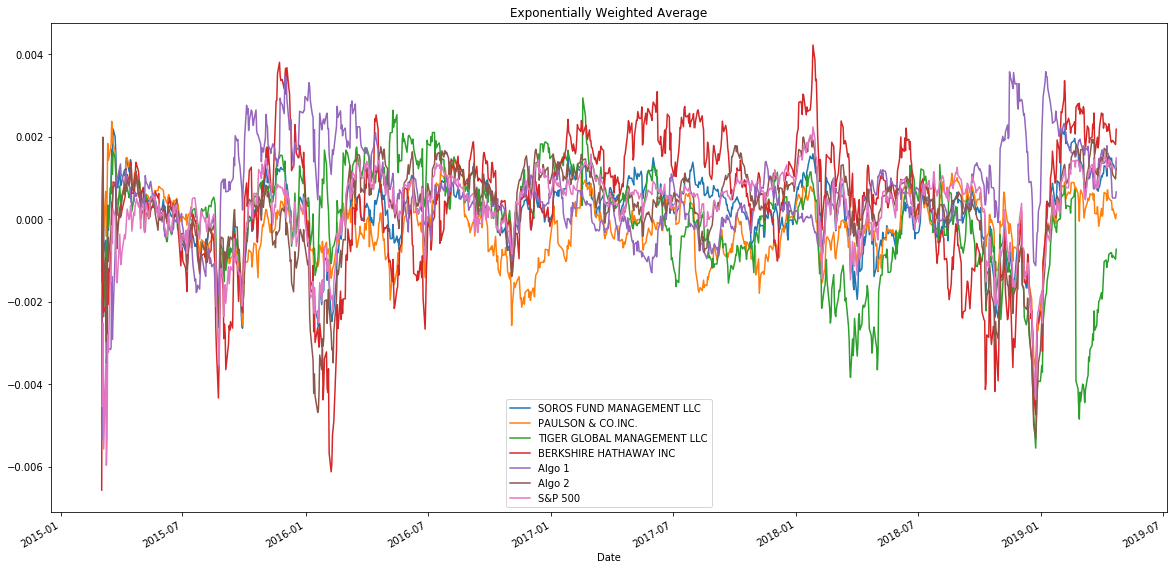

In [45]:
# Calculate a rolling window using the exponentially weighted moving average. 
combined_df.ewm(halflife=21).mean().plot(figsize=(20, 10), title='Exponentially Weighted Average')

In [46]:
# SHARPE RATIO

In [47]:
1. # Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. # Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios

2.0

In [48]:
# Calculate annualized Sharpe Ratios
sharpe_ratio = (combined_df.mean()*252)/(combined_df.std()*np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

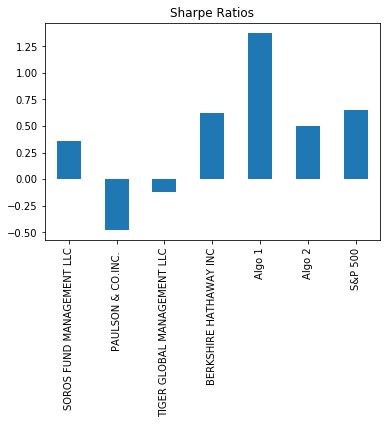

In [49]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(title="Sharpe Ratios")

In [50]:
#On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:
#Based on this metric our algo 1 strategies outperformed both 'the market' and the whales 
#however our algo 2 strategies did not outperform all of them. 

In [51]:
# Portfolio Returns

In [52]:
# Read Bestbuy Data

In [53]:
bby_csv_path = Path("../Resources/Bestbuy Closing Prices.csv")
bby_history_df = pd.read_csv(bby_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
bby_history_df.head()

,Close
Date,
2012-01-03,23.68
2012-01-04,23.23
2012-01-05,23.44
2012-01-06,24.22
2012-01-09,24.62


In [54]:
bby_history_df.dtypes

Close    float64
dtype: object

In [55]:
# Calculate daily returns
bby_daily_returns = bby_history_df.pct_change()
bby_daily_returns

,Close
Date,
2012-01-03,NaN
2012-01-04,-0.019003
2012-01-05,0.009040
2012-01-06,0.033276
2012-01-09,0.016515
...,...
2019-12-23,-0.001026
2019-12-24,0.003309
2019-12-26,-0.000910


In [56]:
# Drop Nulls
bby_daily_returns.dropna(inplace=True)
bby_daily_returns.head()

,Close
Date,
2012-01-04,-0.019003
2012-01-05,0.009040
2012-01-06,0.033276
2012-01-09,0.016515
2012-01-10,0.004062


In [57]:
# Rename Column
bby_daily_returns.rename(columns = {"Close":"BBY"}, inplace = True)
bby_daily_returns

,BBY
Date,
2012-01-04,-0.019003
2012-01-05,0.009040
2012-01-06,0.033276
2012-01-09,0.016515
2012-01-10,0.004062
...,...
2019-12-23,-0.001026
2019-12-24,0.003309
2019-12-26,-0.000910


In [58]:
# Read Tesla Data

In [59]:
tsla_csv_path = Path("../Resources/Tesla Closing Prices.csv")
tsla_history_df = pd.read_csv(bby_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
tsla_history_df.head()

,Close
Date,
2012-01-03,23.68
2012-01-04,23.23
2012-01-05,23.44
2012-01-06,24.22
2012-01-09,24.62


In [60]:
# Check Data Types

In [61]:
tsla_history_df.dtypes

Close    float64
dtype: object

In [62]:
# Calculate daily returns
tsla_daily_returns = tsla_history_df.pct_change()
tsla_daily_returns

,Close
Date,
2012-01-03,NaN
2012-01-04,-0.019003
2012-01-05,0.009040
2012-01-06,0.033276
2012-01-09,0.016515
...,...
2019-12-23,-0.001026
2019-12-24,0.003309
2019-12-26,-0.000910


In [63]:
# Drop Nulls
tsla_daily_returns.dropna(inplace=True)
tsla_daily_returns.head()

,Close
Date,
2012-01-04,-0.019003
2012-01-05,0.009040
2012-01-06,0.033276
2012-01-09,0.016515
2012-01-10,0.004062


In [64]:
tsla_daily_returns.rename(columns = {"Close":"TSLA"}, inplace = True)
tsla_daily_returns

,TSLA
Date,
2012-01-04,-0.019003
2012-01-05,0.009040
2012-01-06,0.033276
2012-01-09,0.016515
2012-01-10,0.004062
...,...
2019-12-23,-0.001026
2019-12-24,0.003309
2019-12-26,-0.000910


In [65]:
# Read Twitter Data

In [66]:
twtr_csv_path = Path("../Resources/Twitter Closing Prices.csv")
twtr_history_df = pd.read_csv(bby_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
twtr_history_df.head()

,Close
Date,
2012-01-03,23.68
2012-01-04,23.23
2012-01-05,23.44
2012-01-06,24.22
2012-01-09,24.62


In [67]:
# Check Data Types

In [68]:
twtr_history_df.dtypes

Close    float64
dtype: object

In [69]:
# Calculate daily returns
twtr_daily_returns = twtr_history_df.pct_change()
twtr_daily_returns

,Close
Date,
2012-01-03,NaN
2012-01-04,-0.019003
2012-01-05,0.009040
2012-01-06,0.033276
2012-01-09,0.016515
...,...
2019-12-23,-0.001026
2019-12-24,0.003309
2019-12-26,-0.000910


In [70]:
# Drop Nulls
twtr_daily_returns.dropna(inplace=True)
twtr_daily_returns.head()

,Close
Date,
2012-01-04,-0.019003
2012-01-05,0.009040
2012-01-06,0.033276
2012-01-09,0.016515
2012-01-10,0.004062


In [71]:
# Rename Column
twtr_daily_returns.rename(columns = {"Close":"TWTR"}, inplace = True)
twtr_daily_returns

,TWTR
Date,
2012-01-04,-0.019003
2012-01-05,0.009040
2012-01-06,0.033276
2012-01-09,0.016515
2012-01-10,0.004062
...,...
2019-12-23,-0.001026
2019-12-24,0.003309
2019-12-26,-0.000910


In [72]:
twtr_daily_returns.dropna()

,TWTR
Date,
2012-01-04,-0.019003
2012-01-05,0.009040
2012-01-06,0.033276
2012-01-09,0.016515
2012-01-10,0.004062
...,...
2019-12-23,-0.001026
2019-12-24,0.003309
2019-12-26,-0.000910


In [73]:
# Concatenate all stocks into a single DataFrame
portfolio_df = pd.concat([bby_daily_returns, tsla_daily_returns, twtr_daily_returns], axis="columns", join="inner")
# Sort datetime index in ascending order (past to present)
portfolio_df.sort_index(inplace=True)
portfolio_df.head()

,BBY,TSLA,TWTR
Date,,,
2012-01-04,-0.019003,-0.019003,-0.019003
2012-01-05,0.009040,0.009040,0.009040
2012-01-06,0.033276,0.033276,0.033276
2012-01-09,0.016515,0.016515,0.016515
2012-01-10,0.004062,0.004062,0.004062


In [74]:
# Reset index
portfolio_df.sort_index(inplace=True)
portfolio_df.head()

,BBY,TSLA,TWTR
Date,,,
2012-01-04,-0.019003,-0.019003,-0.019003
2012-01-05,0.009040,0.009040,0.009040
2012-01-06,0.033276,0.033276,0.033276
2012-01-09,0.016515,0.016515,0.016515
2012-01-10,0.004062,0.004062,0.004062


In [75]:
# Pivot so that each column of prices represents a unique symbol
portfolio_df.head()

,BBY,TSLA,TWTR
Date,,,
2012-01-04,-0.019003,-0.019003,-0.019003
2012-01-05,0.009040,0.009040,0.009040
2012-01-06,0.033276,0.033276,0.033276
2012-01-09,0.016515,0.016515,0.016515
2012-01-10,0.004062,0.004062,0.004062


In [76]:
# Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [77]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_returns = portfolio_df.dot([1/3, 1/3, 1/3])
portfolio_returns.head()

Date
2012-01-04   -0.019003
2012-01-05    0.009040
2012-01-06    0.033276
2012-01-09    0.016515
2012-01-10    0.004062
dtype: float64

In [78]:
portfolio_returns.dropna()

Date
2012-01-04   -0.019003
2012-01-05    0.009040
2012-01-06    0.033276
2012-01-09    0.016515
2012-01-10    0.004062
                ...   
2019-12-23   -0.001026
2019-12-24    0.003309
2019-12-26   -0.000910
2019-12-27   -0.009562
2019-12-30    0.006436
Length: 2010, dtype: float64

In [79]:
 # Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [87]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
joined_df = pd.concat([combined_df, portfolio_df], axis="columns", join="inner")
# Sort datetime index in ascending order (past to present)
joined_df.sort_index(inplace=True)
joined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,BBY,TSLA,TWTR
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.014238,0.014238,0.014238
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.015569,0.015569,0.015569
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.004021,-0.004021,-0.004021
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,0.002019,0.002019,0.002019
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.003022,0.003022,0.003022


In [82]:
#Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [89]:
# Risk
volatility = joined_df.std()
volatility

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
BBY                            0.021918
TSLA                           0.021918
TWTR                           0.021918
dtype: float64

In [90]:
volatility > volatility["S&P 500"]

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
BBY                             True
TSLA                            True
TWTR                            True
dtype: bool

In [ ]:
# Annualized Standard Deviation

In [91]:
volatility = joined_df.std()*np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
BBY                            0.347944
TSLA                           0.347944
TWTR                           0.347944
dtype: float64

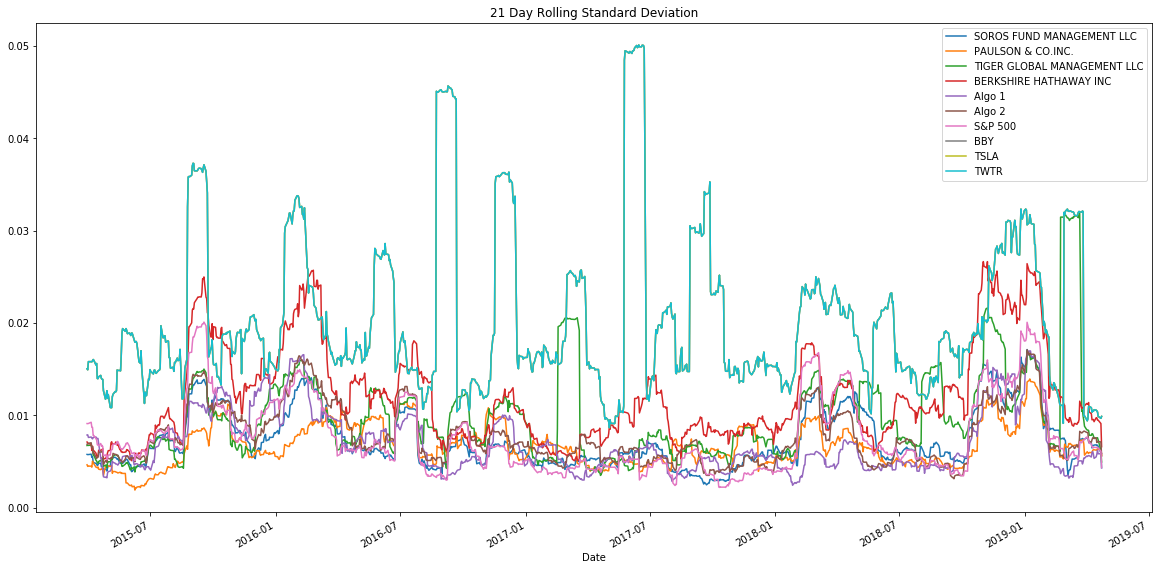

In [92]:
# Rolling
joined_df.rolling(window=21).std().plot(figsize=(20, 10), title='21 Day Rolling Standard Deviation')

In [93]:
# Annualized Sharpe Ratios
sharpe_ratio = (joined_df.mean()*252)/(joined_df.std()*np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
BBY                            0.618153
TSLA                           0.618153
TWTR                           0.618153
dtype: float64

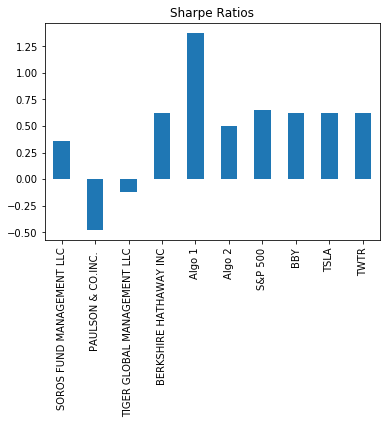

In [94]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(title="Sharpe Ratios")

In [ ]:
# Based on this algo 1 is outperforming all of them. My custom portfolio is doing as good as algo 2 and Berkshire Hathaway Inc, but less than the S&P 500.

In [95]:
# Create a correlation analysis
correlation = joined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,BBY,TSLA,TWTR
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.339916,0.339916,0.339916
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.249937,0.249937,0.249937
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.215454,0.215454,0.215454
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.310264,0.310264,0.310264
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,0.119981,0.119981,0.119981
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,0.387474,0.387474,0.387474
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,0.372756,0.372756,0.372756
BBY,0.339916,0.249937,0.215454,0.310264,0.119981,0.387474,0.372756,1.000000,1.000000,1.000000
TSLA,0.339916,0.249937,0.215454,0.310264,0.119981,0.387474,0.372756,1.000000,1.000000,1.000000
TWTR,0.339916,0.249937,0.215454,0.310264,0.119981,0.387474,0.372756,1.000000,1.000000,1.000000


In [ ]:
# Beta

In [ ]:
# Calculate Covariance for Bestbuy vs S&P 500

In [96]:
covariance = portfolio_df['BBY'].cov(sp500_returns_df['S&P 500'])
covariance

6.8631695909824e-05

In [ ]:
# Calculate Variance for Bestbuy

In [97]:
variance = portfolio_df['BBY'].var()
variance

0.0006266370272030242

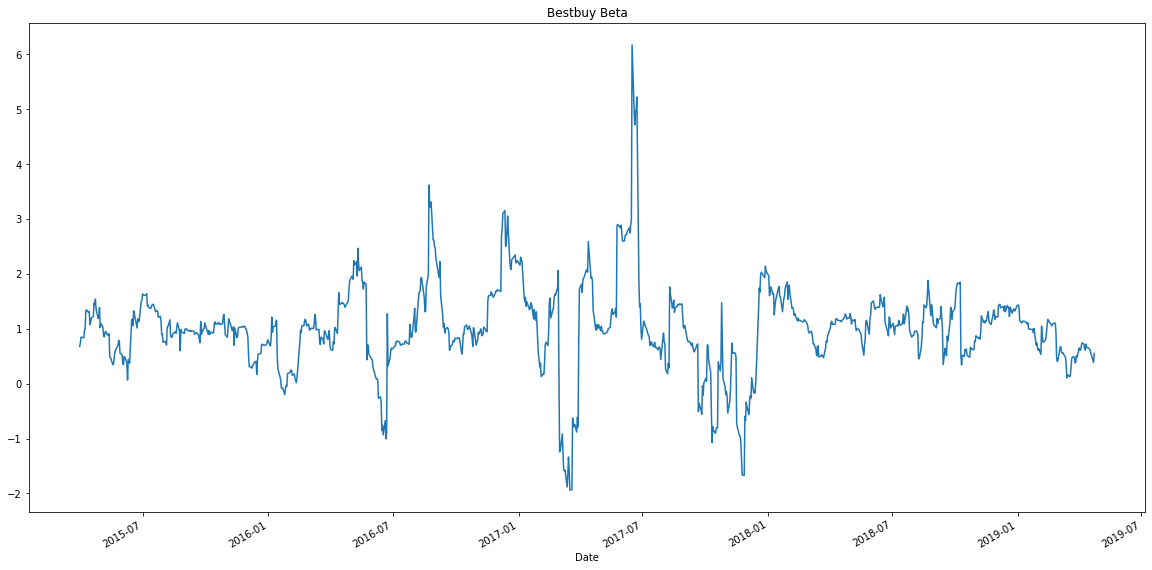

In [98]:
BBY_Roll = joined_df['BBY'].rolling(window=21).cov(sp500_returns_df['S&P 500'])/sp500_returns_df['S&P 500'].rolling(window=21).var()
BBY_Roll.dropna(inplace=True)
BBY_Roll.plot(figsize=(20, 10), title='Bestbuy Beta')